In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from keras.preprocessing.text import Tokenizer
from keras import preprocessing
import keras
from tensorflow.keras.layers import Embedding,Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

<h3>1. Text Classification
It is highly recommended that you complete this project using Keras1 and Python.
<br><br>(a) In this problem, we are trying to build a classifier to analyze the sentiment of
reviews. You are provided with text data in two folders: one folder involves
positive reviews, and one folder involves negative reviews.
(<br><br>b) Data Exploration and Pre-processing
<br>i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.

In [3]:
directory = '../data/pos'
rev = [] 
sent = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
#         print(f)
        with open(f) as fp:
            v = fp.read()
        rev.append(v)
        sent.append(1)

In [4]:
directory = '../data/neg'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
#         print(f)
        with open(f) as fp:
            v = fp.read()
        rev.append(v)
        sent.append(-1)

In [5]:
d = {'reviews' : rev, 'sentiment' : sent}

In [6]:
df = pd.DataFrame(d, columns=['reviews','sentiment'])

<h3>ii. The data are pretty clean. Remove the punctuation and numbers from the
data

In [7]:
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]+', '')
df['reviews'] = df['reviews'].str.replace('\d+', '')

<h3>iii. The name of each text file starts with cv number. Use text files 0-699 in each
class for training and 700-999 for testing.

In [8]:
train1 = df.iloc[:700]
train2 = df.iloc[1000:1700]
test1 = df.iloc[700:1000]
test2 = df.iloc[1700:2000]
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [9]:
print("test: ",test.shape)
print("train: ",train.shape)

test:  (600, 2)
train:  (1400, 2)


<h3>iv. Count the number of unique words in the whole dataset (train + test) and
print it out.

In [12]:
t  = Tokenizer()
t.fit_on_texts(df['reviews'])

In [13]:
wordcount = t.word_counts
print('Total Unique word count :',len(wordcount))

Total Unique word count : 46737


In [14]:
t.word_docs

defaultdict(int,
            {'was': 1495,
             'starters': 8,
             'dark': 212,
             'richardson': 20,
             'thats': 553,
             'whores': 2,
             'filthy': 4,
             'goulds': 3,
             'roles': 243,
             'dreamy': 8,
             'copious': 6,
             'like': 1470,
             'her': 1112,
             'completely': 353,
             'song': 97,
             'includes': 100,
             'she': 890,
             'find': 577,
             'campbell': 45,
             'crack': 35,
             'attempt': 226,
             'case': 314,
             'though': 636,
             'original': 421,
             'for': 1922,
             'crazy': 72,
             'big': 611,
             'chooses': 37,
             'language': 102,
             'look': 605,
             'blindly': 5,
             'print': 23,
             'whistling': 1,
             'will': 1070,
             'half': 295,
             'violent': 114,
   

<h3>v. Calculate the average review length and the standard deviation of review
lengths. Report the results.

In [15]:
df['reviews_word_count'] = df['reviews'].str.split().str.len()

In [16]:
print(df['reviews_word_count'])

0        679
1        650
2        416
3        997
4        644
        ... 
1995    1366
1996    1009
1997     396
1998     521
1999     503
Name: reviews_word_count, Length: 2000, dtype: int64


In [18]:
print('Standard Deviation of word_count',df['reviews_word_count'].std())

Standard Deviation of word_count 285.0513950898525


In [19]:
print('Average of word_count',df['reviews_word_count'].mean())

Average of word_count 644.3575


<h3>vi. Plot the histogram of review lengths.


array([[<AxesSubplot:title={'center':'reviews_word_count'}>]],
      dtype=object)

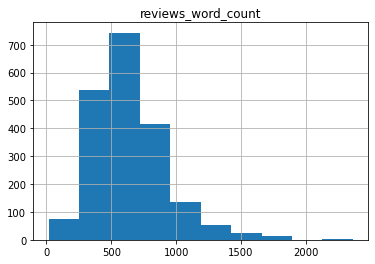

In [20]:
df.hist(column = 'reviews_word_count')

<h3>vii. To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method.2

In [21]:
sequence = t.texts_to_sequences(df['reviews'])

In [22]:
df['sequence'] = sequence

In [23]:
df.head()

,reviews,sentiment,reviews_word_count,sequence
0,films adapted from comic books have had plenty...,1,679,"[67, 2745, 29, 355, 1634, 32, 90, 1047, 4, 627..."
1,every now and then a movie comes along from a ...,1,650,"[150, 144, 3, 102, 2, 27, 199, 264, 29, 2, 151..."
2,youve got mail works alot better than it deser...,1,416,"[729, 287, 3642, 379, 9979, 153, 58, 9, 1213, ..."
3,jaws is a rare film that grabs your attenti...,1,997,"[3244, 6, 2, 1400, 15, 8, 6920, 171, 559, 142,..."
4,moviemaking is a lot like being the general ma...,1,644,"[4789, 6, 2, 211, 39, 109, 1, 834, 3095, 4, 24..."


<h3>viii. Select a review length L that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.


In [59]:
L = df['reviews_word_count'].quantile(0.7)
print('Review Length at 70%: ', L)

Review Length at 70%:  737.0


<h3>ix. Truncate reviews longer than L words and zero-pad reviews shorter than L
so that all texts (= data points) are of length L.

In [25]:
df['padding'] = preprocessing.sequence.pad_sequences(df['sequence'],maxlen = int(L)).tolist()

In [26]:
df.head()

,reviews,sentiment,reviews_word_count,sequence,padding
0,films adapted from comic books have had plenty...,1,679,"[67, 2745, 29, 355, 1634, 32, 90, 1047, 4, 627...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,every now and then a movie comes along from a ...,1,650,"[150, 144, 3, 102, 2, 27, 199, 264, 29, 2, 151...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,youve got mail works alot better than it deser...,1,416,"[729, 287, 3642, 379, 9979, 153, 58, 9, 1213, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,jaws is a rare film that grabs your attenti...,1,997,"[3244, 6, 2, 1400, 15, 8, 6920, 171, 559, 142,...","[1613, 5772, 2342, 9981, 114, 252, 5, 2865, 16..."
4,moviemaking is a lot like being the general ma...,1,644,"[4789, 6, 2, 211, 39, 109, 1, 834, 3095, 4, 24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


<h3>(c) Word Embeddings
<br><br>i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of
text yield better results. These sophisticated representations are called word
embeddings. “Word embedding is a term used for representation of words
for text analysis, typically in the form of a real-valued vector that encodes
the meaning of the word such that the words that are closer in the vector
space are expected to be similar in meaning.”4
. Most deep learning modules
(including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The
layer accepts arguments that define the mapping of words into embeddings,(c) Word Embeddings
i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of
text yield better results. These sophisticated representations are called word
embeddings. “Word embedding is a term used for representation of words
for text analysis, typically in the form of a real-valued vector that encodes
the meaning of the word such that the words that are closer in the vector
space are expected to be similar in meaning.”4
. Most deep learning modules
(including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The
layer accepts arguments that define the mapping of words into embeddings,

In [27]:
model = Sequential()
model.add(Embedding(46738, 32, input_length=int(L)))

<h3>ii. Flatten the matrix of each document to a vector.


In [28]:
model.add(Flatten(input_shape=(None, 737, 32) ))

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           1495616   
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
Total params: 1,495,616
Trainable params: 1,495,616
Non-trainable params: 0
_________________________________________________________________
None


<h3>(d) Multi-Layer Perceptron
<br><br>i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs
and one output layer with a single sigmoid neuron. Use a dropout rate of
20% for the first layer and 50% for the other layers. Use ADAM optimizer
and binary cross entropy loss (which is equivalent to having a softmax in the
output). To avoid overfitting, just set the number of epochs as 2. Use a batch
size of 10.


In [30]:
train1 = df.iloc[:700]
train2 = df.iloc[1000:1700]
test1 = df.iloc[700:1000]
test2 =df.iloc[1700:2000]
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [33]:
padding_test = preprocessing.sequence.pad_sequences(test['sequence'],maxlen = int(L))

In [34]:
padding_test.shape

(600, 737)

In [35]:
padding = preprocessing.sequence.pad_sequences(train['sequence'],maxlen = int(L))

In [36]:
padding.shape

(1400, 737)

In [37]:
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           1495616   
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [39]:
padding[0].shape

(737,)

In [40]:
model.fit(padding, train['sentiment'], epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 5s 29ms/step - loss: 0.6932 - acc: 0.5364
Epoch 2/2
140/140 [==============================] - 4s 28ms/step - loss: 0.5618 - acc: 0.7179


<h3>ii. Report the train and test accuracies of this model.

In [41]:
loss, accuracy = model.evaluate(padding, train['sentiment'], verbose=0)
print('Train Accuracy: %f' % (accuracy*100))

Train Accuracy: 97.214288


In [42]:
loss, accuracy = model.evaluate(padding_test, test['sentiment'], verbose=0)
print('Test Accuracy: %f' % (accuracy*100))

Test Accuracy: 64.666665


<h3>(e) One-Dimensional Convolutional Neural Network:
Although CNNs are mainly used for image data, they can also be applied to text
data, as text also has adjacency information. Keras supports one-dimensional
convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.
<br><br>i. After the embedding layer, insert a Conv1D layer. This convolutional layer
has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded
word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a 1D max pooling layer with a length and
stride of 2 that halves the size of the feature maps from the convolutional
layer. The rest of the network is the same as the neural network above.


In [43]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [44]:
model2 = Sequential()
model2.add(Embedding(46738, 32, input_length=int(L)))
model2.add(Conv1D(filters=32, kernel_size = 3, input_shape = (None, 737, 32) ))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [45]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           1495616   
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

<h3>ii. Report the train and test accuracies of this model.

In [46]:
model2.fit(padding, train['sentiment'], epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 5s 30ms/step - loss: 0.6933 - acc: 0.4983
Epoch 2/2
140/140 [==============================] - 4s 30ms/step - loss: 0.6857 - acc: 0.5584


In [47]:
loss, accuracy = model2.evaluate(padding, train['sentiment'], verbose=0)
print('Train Accuracy: %f' % (accuracy*100))

Train Accuracy: 62.326586


In [48]:
loss, accuracy = model2.evaluate(padding_test, test['sentiment'], verbose=0)
print('Test Accuracy: %f' % (accuracy*100))

Test Accuracy: 56.696635


<h3>(f) Long Short-Term Memory Recurrent Neural Network:
The structure of the LSTM we are going to use is shown in the following figure.
<br><br>i. Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both
LSTM and the dense layer. Train the model using 10-50 epochs and batch
size of 10.


In [49]:
model3 = Sequential()
model3.add(Embedding(46738, 32, input_length=int(L)))
model3.add(LSTM(32, dropout=0.2))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [50]:
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 737, 32)           1495616   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,512,641
Trainable params: 1,512,641
Non-trainable params: 0
_________________________________________________________________
None


<h3>ii. Report the train and test accuracies of this model.


In [51]:
accuracy = [['Number of epochs','Train Accuracy', 'Test Accuracy']]
for i in range(10,51):
    model3.fit(padding, train['sentiment'], epochs=i, batch_size=10)
    train_loss, train_accuracy = model3.evaluate(padding, train['sentiment'], verbose=0)
    test_loss, test_accuracy = model3.evaluate(padding_test, test['sentiment'], verbose=0)
    accuracy.append([i,train_accuracy,test_accuracy])
    
accuracydf = pd.DataFrame(accuracy[1:], columns = accuracy[0])


Epoch 1/10
140/140 [==============================] - 31s 205ms/step - loss: 0.6933 - acc: 0.5114
Epoch 2/10
140/140 [==============================] - 30s 215ms/step - loss: 0.4888 - acc: 0.7964
Epoch 3/10
140/140 [==============================] - 29s 207ms/step - loss: 0.1148 - acc: 0.9593
Epoch 4/10
140/140 [==============================] - 29s 210ms/step - loss: 0.0339 - acc: 0.9886
Epoch 5/10
140/140 [==============================] - 30s 212ms/step - loss: 0.0062 - acc: 0.9986
Epoch 6/10
140/140 [==============================] - 29s 207ms/step - loss: 2.0374e-04 - acc: 1.0000
Epoch 7/10
140/140 [==============================] - 30s 215ms/step - loss: 1.3481e-04 - acc: 1.0000
Epoch 8/10
140/140 [==============================] - 31s 218ms/step - loss: 7.8461e-05 - acc: 1.0000
Epoch 9/10
140/140 [==============================] - 29s 210ms/step - loss: 5.5484e-05 - acc: 1.0000
Epoch 10/10
140/140 [==============================] - 29s 204ms/step - loss: 4.0345e-05 - acc: 1.0000

140/140 [==============================] - 41s 296ms/step - loss: 6.3628e-08 - acc: 1.0000
Epoch 17/20
140/140 [==============================] - 42s 303ms/step - loss: 4.7893e-08 - acc: 1.0000
Epoch 18/20
140/140 [==============================] - 42s 298ms/step - loss: 5.5269e-08 - acc: 1.0000
Epoch 19/20
140/140 [==============================] - 41s 292ms/step - loss: 5.1585e-08 - acc: 1.0000
Epoch 20/20
140/140 [==============================] - 41s 294ms/step - loss: 2.8922e-08 - acc: 1.0000
Epoch 1/21
140/140 [==============================] - 39s 282ms/step - loss: 2.5696e-08 - acc: 1.0000
Epoch 2/21
140/140 [==============================] - 41s 294ms/step - loss: 2.7756e-08 - acc: 1.0000
Epoch 3/21
140/140 [==============================] - 42s 297ms/step - loss: 2.6980e-08 - acc: 1.0000
Epoch 4/21
140/140 [==============================] - 41s 293ms/step - loss: 2.7124e-08 - acc: 1.0000
Epoch 5/21
140/140 [==============================] - 42s 298ms/step - loss: 2.8037e-08 -

140/140 [==============================] - 49s 348ms/step - loss: 1.7992e-09 - acc: 1.0000
Epoch 11/24
140/140 [==============================] - 49s 351ms/step - loss: 3.4133e-10 - acc: 1.0000
Epoch 12/24
140/140 [==============================] - 49s 350ms/step - loss: 2.8923e-10 - acc: 1.0000
Epoch 13/24
140/140 [==============================] - 50s 354ms/step - loss: 5.2276e-10 - acc: 1.0000
Epoch 14/24
140/140 [==============================] - 50s 355ms/step - loss: 3.3045e-10 - acc: 1.0000
Epoch 15/24
140/140 [==============================] - 56s 400ms/step - loss: 4.4379e-10 - acc: 1.0000
Epoch 16/24
140/140 [==============================] - 80s 572ms/step - loss: 3.2532e-10 - acc: 1.0000
Epoch 17/24
140/140 [==============================] - 80s 573ms/step - loss: 1.1873e-10 - acc: 1.0000
Epoch 18/24
140/140 [==============================] - 81s 577ms/step - loss: 4.6552e-10 - acc: 1.0000
Epoch 19/24
140/140 [==============================] - 80s 574ms/step - loss: 1.9451e

140/140 [==============================] - 35s 250ms/step - loss: 1.1617e-07 - acc: 1.0000
Epoch 16/27
140/140 [==============================] - 35s 249ms/step - loss: 1.6709e-07 - acc: 1.0000
Epoch 17/27
140/140 [==============================] - 35s 249ms/step - loss: 7.3995e-08 - acc: 1.0000
Epoch 18/27
140/140 [==============================] - 35s 251ms/step - loss: 1.0064e-07 - acc: 1.0000
Epoch 19/27
140/140 [==============================] - 35s 250ms/step - loss: 2.1948e-07 - acc: 1.0000
Epoch 20/27
140/140 [==============================] - 35s 251ms/step - loss: 4.2820e-08 - acc: 1.0000
Epoch 21/27
140/140 [==============================] - 34s 246ms/step - loss: 2.5561e-08 - acc: 1.0000
Epoch 22/27
140/140 [==============================] - 35s 250ms/step - loss: 5.2290e-08 - acc: 1.0000
Epoch 23/27
140/140 [==============================] - 35s 248ms/step - loss: 4.4685e-08 - acc: 1.0000
Epoch 24/27
140/140 [==============================] - 35s 250ms/step - loss: 3.3373e

140/140 [==============================] - 34s 244ms/step - loss: 3.6662e-07 - acc: 1.0000
Epoch 29/32
140/140 [==============================] - 35s 249ms/step - loss: 7.7416e-07 - acc: 1.0000
Epoch 30/32
140/140 [==============================] - 33s 239ms/step - loss: 5.9210e-07 - acc: 1.0000
Epoch 31/32
140/140 [==============================] - 33s 234ms/step - loss: 2.5466e-07 - acc: 1.0000
Epoch 32/32
140/140 [==============================] - 34s 245ms/step - loss: 2.7044e-07 - acc: 1.0000
Epoch 1/33
140/140 [==============================] - 35s 247ms/step - loss: 1.7466e-07 - acc: 1.0000
Epoch 2/33
140/140 [==============================] - 34s 245ms/step - loss: 3.0906e-07 - acc: 1.0000
Epoch 3/33
140/140 [==============================] - 33s 237ms/step - loss: 3.2122e-07 - acc: 1.0000
Epoch 4/33
140/140 [==============================] - 35s 248ms/step - loss: 2.3311e-07 - acc: 1.0000
Epoch 5/33
140/140 [==============================] - 34s 241ms/step - loss: 2.9215e-07 -

140/140 [==============================] - 35s 248ms/step - loss: 2.2586e-11 - acc: 1.0000
Epoch 17/37
140/140 [==============================] - 35s 248ms/step - loss: 1.3276e-10 - acc: 1.0000
Epoch 18/37
140/140 [==============================] - 34s 242ms/step - loss: 9.6479e-11 - acc: 1.0000
Epoch 19/37
140/140 [==============================] - 34s 246ms/step - loss: 8.1502e-11 - acc: 1.0000
Epoch 20/37
140/140 [==============================] - 34s 246ms/step - loss: 4.3745e-11 - acc: 1.0000
Epoch 21/37
140/140 [==============================] - 35s 248ms/step - loss: 3.2979e-11 - acc: 1.0000
Epoch 22/37
140/140 [==============================] - 34s 244ms/step - loss: 2.4708e-11 - acc: 1.0000
Epoch 23/37
140/140 [==============================] - 35s 248ms/step - loss: 4.2758e-11 - acc: 1.0000
Epoch 24/37
140/140 [==============================] - 35s 246ms/step - loss: 5.1866e-11 - acc: 1.0000
Epoch 25/37
140/140 [==============================] - 35s 247ms/step - loss: 4.3797e

140/140 [==============================] - 34s 245ms/step - loss: 6.1589e-12 - acc: 1.0000
Epoch 21/41
140/140 [==============================] - 34s 246ms/step - loss: 9.8723e-12 - acc: 1.0000
Epoch 22/41
140/140 [==============================] - 35s 247ms/step - loss: 3.6754e-11 - acc: 1.0000
Epoch 23/41
140/140 [==============================] - 35s 247ms/step - loss: 9.8064e-12 - acc: 1.0000
Epoch 24/41
140/140 [==============================] - 35s 248ms/step - loss: 2.0252e-11 - acc: 1.0000
Epoch 25/41
140/140 [==============================] - 35s 247ms/step - loss: 1.3801e-11 - acc: 1.0000
Epoch 26/41
140/140 [==============================] - 34s 244ms/step - loss: 3.7403e-12 - acc: 1.0000
Epoch 27/41
140/140 [==============================] - 35s 248ms/step - loss: 1.6228e-11 - acc: 1.0000
Epoch 28/41
140/140 [==============================] - 34s 243ms/step - loss: 1.4925e-11 - acc: 1.0000
Epoch 29/41
140/140 [==============================] - 35s 250ms/step - loss: 2.0141e

140/140 [==============================] - 35s 249ms/step - loss: 1.6458e-11 - acc: 1.0000
Epoch 9/45
140/140 [==============================] - 34s 245ms/step - loss: 6.4714e-12 - acc: 1.0000
Epoch 10/45
140/140 [==============================] - 35s 249ms/step - loss: 8.4559e-12 - acc: 1.0000
Epoch 11/45
140/140 [==============================] - 35s 248ms/step - loss: 1.4887e-11 - acc: 1.0000
Epoch 12/45
140/140 [==============================] - 35s 250ms/step - loss: 2.0447e-11 - acc: 1.0000
Epoch 13/45
140/140 [==============================] - 35s 247ms/step - loss: 3.4607e-11 - acc: 1.0000
Epoch 14/45
140/140 [==============================] - 34s 246ms/step - loss: 7.0374e-12 - acc: 1.0000
Epoch 15/45
140/140 [==============================] - 34s 246ms/step - loss: 1.8855e-11 - acc: 1.0000
Epoch 16/45
140/140 [==============================] - 35s 247ms/step - loss: 1.3524e-11 - acc: 1.0000
Epoch 17/45
140/140 [==============================] - 34s 245ms/step - loss: 3.7928e-

140/140 [==============================] - 29s 205ms/step - loss: 9.3235e-12 - acc: 1.0000
Epoch 29/48
140/140 [==============================] - 29s 210ms/step - loss: 1.8286e-11 - acc: 1.0000
Epoch 30/48
140/140 [==============================] - 29s 208ms/step - loss: 4.1259e-12 - acc: 1.0000
Epoch 31/48
140/140 [==============================] - 30s 214ms/step - loss: 1.4042e-11 - acc: 1.0000
Epoch 32/48
140/140 [==============================] - 29s 210ms/step - loss: 2.8361e-11 - acc: 1.0000
Epoch 33/48
140/140 [==============================] - 29s 205ms/step - loss: 1.3612e-11 - acc: 1.0000
Epoch 34/48
140/140 [==============================] - 30s 211ms/step - loss: 2.3155e-12 - acc: 1.0000
Epoch 35/48
140/140 [==============================] - 30s 211ms/step - loss: 3.0988e-12 - acc: 1.0000
Epoch 36/48
140/140 [==============================] - 30s 218ms/step - loss: 7.4606e-12 - acc: 1.0000
Epoch 37/48
140/140 [==============================] - 26s 182ms/step - loss: 4.5923e

In [52]:
accuracydf

,Number of epochs,Train Accuracy,Test Accuracy
0,10,1.0,0.786667
1,11,1.0,0.781667
2,12,1.0,0.773333
3,13,1.0,0.773333
4,14,1.0,0.790000
5,15,1.0,0.786667
6,16,1.0,0.723333
7,17,1.0,0.723333
8,18,1.0,0.731667
9,19,1.0,0.735000


<h4> We get train accuracy as 1.0 for all the epochs and test accuracy is best for 14 epochs at 0.79. Hence we train the model again at 14 epochs

In [56]:
model3.fit(padding, train['sentiment'], epochs=14, batch_size=10)
train_loss, train_accuracy = model3.evaluate(padding, train['sentiment'], verbose=0)
test_loss, test_accuracy = model3.evaluate(padding_test, test['sentiment'], verbose=0)

Epoch 1/14
140/140 [==============================] - 41s 293ms/step - loss: 3.1209e-12 - acc: 1.0000
Epoch 2/14
140/140 [==============================] - 41s 296ms/step - loss: 2.6095e-12 - acc: 1.0000
Epoch 3/14
140/140 [==============================] - 41s 291ms/step - loss: 8.8172e-12 - acc: 1.0000
Epoch 4/14
140/140 [==============================] - 41s 294ms/step - loss: 1.4209e-11 - acc: 1.0000
Epoch 5/14
140/140 [==============================] - 40s 289ms/step - loss: 4.7626e-12 - acc: 1.0000
Epoch 6/14
140/140 [==============================] - 41s 291ms/step - loss: 1.6962e-12 - acc: 1.0000
Epoch 7/14
140/140 [==============================] - 42s 301ms/step - loss: 6.4070e-12 - acc: 1.0000
Epoch 8/14
140/140 [==============================] - 41s 296ms/step - loss: 7.6333e-12 - acc: 1.0000
Epoch 9/14
140/140 [==============================] - 40s 285ms/step - loss: 1.6799e-11 - acc: 1.0000
Epoch 10/14
140/140 [==============================] - 38s 274ms/step - loss: 2.00

In [57]:
print('Train Accuracy: %f' % (train_accuracy*100))
print('Test Accuracy: %f' % (test_accuracy*100))

Train Accuracy: 100.000000
Test Accuracy: 71.666664


References:
<br>
https://keras.rstudio.com/reference/text_tokenizer.html<br>
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit<br>
https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/<br>
https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/